Importing the dependencies

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Importing the data

In [41]:
data = pd.read_csv(r'Datasets/train.csv')

In [42]:
data

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


Data Preprocessing

In [43]:
data.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [44]:
data.drop(columns=['id'],inplace=True)

In [45]:
data['country'].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      230130 non-null  object 
 1   country   230130 non-null  object 
 2   store     230130 non-null  object 
 3   product   230130 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 8.8+ MB


In [47]:
# Vectorizing the country data

data.replace({'country':{'Canada':0,'Finland':1,'Italy':2,'Kenya':3,'Norway':4,'Singapore':5}}, inplace=True)

C:\Users\Musta\AppData\Local\Temp\ipykernel_9264\642111034.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'country':{'Canada':0,'Finland':1,'Italy':2,'Kenya':3,'Norway':4,'Singapore':5}}, inplace=True)


In [48]:
data['country'].value_counts()

country
0    38355
1    38355
2    38355
3    38355
4    38355
5    38355
Name: count, dtype: int64

In [49]:
#Now handling the dates separating it with year, month and day
data['date'] = pd.to_datetime(data['date'])

In [50]:
data

,date,country,store,product,num_sold
0,2010-01-01,0,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,0,Discount Stickers,Kaggle,973.0
2,2010-01-01,0,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,0,Discount Stickers,Kerneler,423.0
4,2010-01-01,0,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...
230125,2016-12-31,5,Premium Sticker Mart,Holographic Goose,466.0
230126,2016-12-31,5,Premium Sticker Mart,Kaggle,2907.0
230127,2016-12-31,5,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,2016-12-31,5,Premium Sticker Mart,Kerneler,1242.0


In [51]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [52]:
data.drop(columns=['date'],inplace=True)

In [53]:
data

,country,store,product,num_sold,year,month,day
0,0,Discount Stickers,Holographic Goose,NaN,2010,1,1
1,0,Discount Stickers,Kaggle,973.0,2010,1,1
2,0,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,0,Discount Stickers,Kerneler,423.0,2010,1,1
4,0,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1
...,...,...,...,...,...,...,...
230125,5,Premium Sticker Mart,Holographic Goose,466.0,2016,12,31
230126,5,Premium Sticker Mart,Kaggle,2907.0,2016,12,31
230127,5,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,31
230128,5,Premium Sticker Mart,Kerneler,1242.0,2016,12,31


In [54]:
# handling the store data by removing the spaces between the store names
data['store'] = data['store'].apply(lambda x: x.replace(' ', ''))

In [55]:
data['store'].value_counts()

store
DiscountStickers      76710
StickersforLess       76710
PremiumStickerMart    76710
Name: count, dtype: int64

In [56]:
data

,country,store,product,num_sold,year,month,day
0,0,DiscountStickers,Holographic Goose,NaN,2010,1,1
1,0,DiscountStickers,Kaggle,973.0,2010,1,1
2,0,DiscountStickers,Kaggle Tiers,906.0,2010,1,1
3,0,DiscountStickers,Kerneler,423.0,2010,1,1
4,0,DiscountStickers,Kerneler Dark Mode,491.0,2010,1,1
...,...,...,...,...,...,...,...
230125,5,PremiumStickerMart,Holographic Goose,466.0,2016,12,31
230126,5,PremiumStickerMart,Kaggle,2907.0,2016,12,31
230127,5,PremiumStickerMart,Kaggle Tiers,2299.0,2016,12,31
230128,5,PremiumStickerMart,Kerneler,1242.0,2016,12,31


In [57]:
data['product'].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

In [58]:
# Vectorizing the product data
# handling the store data by removing the spaces between the store names
data['product'] = data['product'].apply(lambda x: x.replace(' ', ''))

In [59]:
data

,country,store,product,num_sold,year,month,day
0,0,DiscountStickers,HolographicGoose,NaN,2010,1,1
1,0,DiscountStickers,Kaggle,973.0,2010,1,1
2,0,DiscountStickers,KaggleTiers,906.0,2010,1,1
3,0,DiscountStickers,Kerneler,423.0,2010,1,1
4,0,DiscountStickers,KernelerDarkMode,491.0,2010,1,1
...,...,...,...,...,...,...,...
230125,5,PremiumStickerMart,HolographicGoose,466.0,2016,12,31
230126,5,PremiumStickerMart,Kaggle,2907.0,2016,12,31
230127,5,PremiumStickerMart,KaggleTiers,2299.0,2016,12,31
230128,5,PremiumStickerMart,Kerneler,1242.0,2016,12,31


In [60]:
data['product'].value_counts()

product
HolographicGoose    46026
Kaggle              46026
KaggleTiers         46026
Kerneler            46026
KernelerDarkMode    46026
Name: count, dtype: int64

Now lets us perform one hot encoding 

In [61]:
#One Hot Encoding
columns_to_encode = ['store', 'product']

encoder = OneHotEncoder(sparse_output=False)  # drop='first' avoids the dummy variable trap

encoded_columns = encoder.fit_transform(data[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

data = pd.concat([data.drop(columns_to_encode, axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [62]:
encoded_df

,store_DiscountStickers,store_PremiumStickerMart,store_StickersforLess,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
230125,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
230126,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
230127,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
230128,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
data

,country,num_sold,year,month,day,store_DiscountStickers,store_PremiumStickerMart,store_StickersforLess,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode
0,0,NaN,2010,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,973.0,2010,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,906.0,2010,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,423.0,2010,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,491.0,2010,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,5,466.0,2016,12,31,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
230126,5,2907.0,2016,12,31,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
230127,5,2299.0,2016,12,31,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
230128,5,1242.0,2016,12,31,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   country                   230130 non-null  int64  
 1   num_sold                  221259 non-null  float64
 2   year                      230130 non-null  int32  
 3   month                     230130 non-null  int32  
 4   day                       230130 non-null  int32  
 5   store_DiscountStickers    230130 non-null  float64
 6   store_PremiumStickerMart  230130 non-null  float64
 7   store_StickersforLess     230130 non-null  float64
 8   product_HolographicGoose  230130 non-null  float64
 9   product_Kaggle            230130 non-null  float64
 10  product_KaggleTiers       230130 non-null  float64
 11  product_Kerneler          230130 non-null  float64
 12  product_KernelerDarkMode  230130 non-null  float64
dtypes: float64(9), int32(3), int64(1)
memory usa

In [65]:
data['num_sold'].value_counts().head(10)

num_sold
5.0     1947
6.0     1703
16.0    1434
7.0     1382
15.0    1365
14.0    1360
17.0    1338
18.0    1236
13.0    1172
19.0    1117
Name: count, dtype: int64

In [66]:
data['year'].value_counts()

year
2012    32940
2016    32940
2010    32850
2011    32850
2013    32850
2014    32850
2015    32850
Name: count, dtype: int64

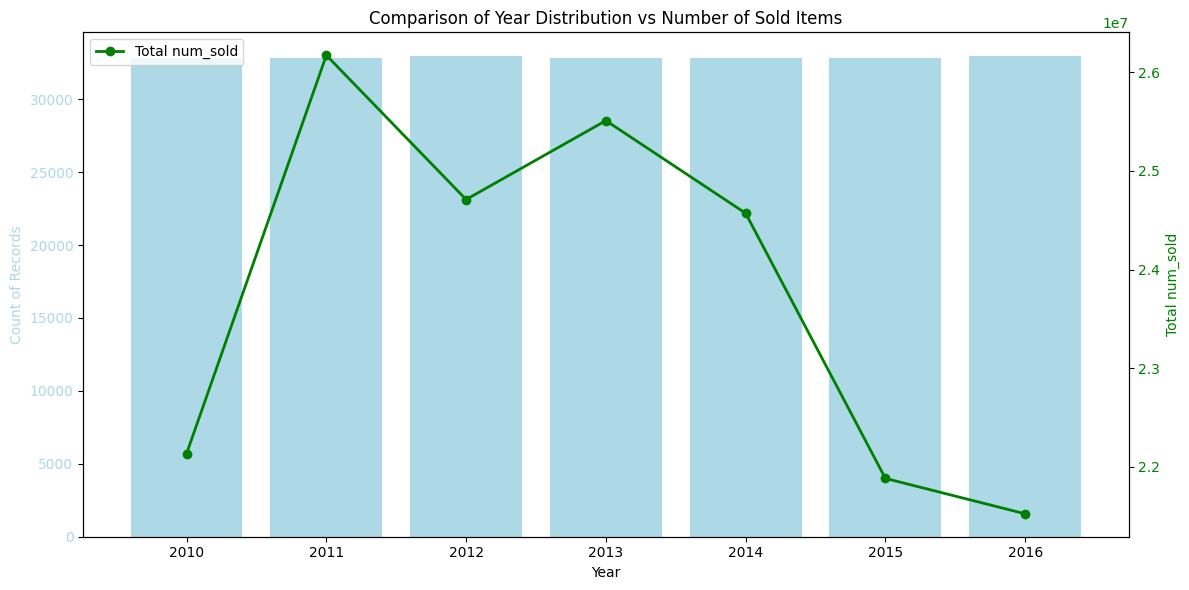

In [67]:
import matplotlib.pyplot as plt

# Count of records per year
year_counts = data['year'].value_counts().sort_index()

# Sum of 'num_sold' per year (or you can use 'mean' depending on your preference)
num_sold_per_year = data.groupby('year')['num_sold'].sum().sort_index()

# Create subplots to compare the two distributions
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the year distribution on the left axis
ax1.bar(year_counts.index, year_counts.values, color='lightblue', label='Year Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Records', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.set_title('Comparison of Year Distribution vs Number of Sold Items')

# Create a second y-axis to plot num_sold per year
ax2 = ax1.twinx()
ax2.plot(num_sold_per_year.index, num_sold_per_year.values, color='green', marker='o', label='Total num_sold', linestyle='-', linewidth=2)
ax2.set_ylabel('Total num_sold', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Show the plot
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()


In [68]:
data['num_sold'] = data['num_sold'].fillna(method='ffill')

# Then apply backward fill to handle any remaining NaN values
data['num_sold'] = data['num_sold'].fillna(method='bfill')

C:\Users\Musta\AppData\Local\Temp\ipykernel_9264\2714245344.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['num_sold'] = data['num_sold'].fillna(method='ffill')
C:\Users\Musta\AppData\Local\Temp\ipykernel_9264\2714245344.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['num_sold'] = data['num_sold'].fillna(method='bfill')


In [69]:
data.isnull().sum()

country                     0
num_sold                    0
year                        0
month                       0
day                         0
store_DiscountStickers      0
store_PremiumStickerMart    0
store_StickersforLess       0
product_HolographicGoose    0
product_Kaggle              0
product_KaggleTiers         0
product_Kerneler            0
product_KernelerDarkMode    0
dtype: int64

In [70]:
data   

,country,num_sold,year,month,day,store_DiscountStickers,store_PremiumStickerMart,store_StickersforLess,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode
0,0,973.0,2010,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,973.0,2010,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,906.0,2010,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,423.0,2010,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,491.0,2010,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,5,466.0,2016,12,31,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
230126,5,2907.0,2016,12,31,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
230127,5,2299.0,2016,12,31,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
230128,5,1242.0,2016,12,31,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Splitting the data in X and Y

In [71]:
X = data.drop(columns='num_sold')
Y = data['num_sold']

In [72]:
print(X.shape)
print(Y.shape)

(230130, 12)
(230130,)


Splitting the data in train test split

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [74]:
print(X_train.shape,X_test.shape,X.shape)

(184104, 12) (46026, 12) (230130, 12)


Model Implementation

In [75]:
#Random Forest Classifier
random_fmodel = RandomForestClassifier(n_estimators=100, random_state=42)    
